## Week 8 Mini-Assignment
### 480381381 - Group 3

### Part 1

The 'intro_to_pandas' was reasonably helpful to me. I have had previous experience with pandas so I understand how the package works, but I often forget how to do the routine tasks. Having some extra tools such as reindexing is also very useful.

The 'charts' workbook was also helpful, but I already knew many aspects of it since I have extensive experience using matplotlib and pyplot. However, I had not seen many of the packages presented toward the end of the booklet, and I may look into these further for future data visualisation projects (including this one!)

### Part 2
In this notebook, we perform some initial exploratory analysis on the two movement datasets provided for each participant in the study. The driving question is the following:

*What is the best way to extract the data provided by the QSAccess app and what initial insights are we able to gain into the data that will be useful for later analysis?*

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The data we import is stored in two csv files. We initially just look at the data for User1, and we can repeat much of this for User 2 when needed.

In [132]:
#Allow for adjustment of file path
FILEPATH = ""

df1 = pd.read_csv(FILEPATH + "User1.csv")
df1.head()

,Start,Finish,Steps (count)
0,07-Dec-2014 09:00,07-Dec-2014 10:00,941.0
1,07-Dec-2014 10:00,07-Dec-2014 11:00,408.0
2,07-Dec-2014 11:00,07-Dec-2014 12:00,157.0
3,07-Dec-2014 12:00,07-Dec-2014 13:00,1017.0
4,07-Dec-2014 13:00,07-Dec-2014 14:00,0.0


One point of initial analysis is to make sure the data is properly formatted. To do this, we can check for the number of na values and plot a histogram of the step counts to make sure there are no negative values etc. We also want to relabel the "Steps (count)" column and convert each of these to integers.

In [133]:
print(df1.isnull().sum())

Start            0
Finish           0
Steps (count)    0
dtype: int64


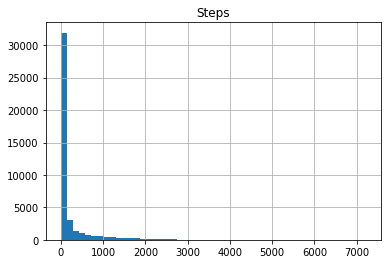

In [134]:
df1.columns = ["Start", "Finish", "Steps"]
df1["Steps"] = list(map(int, df1["Steps"]))
df1.hist(bins = 50)
plt.show()

This histogram seems reasonable. There will be many hours of the day where 0 steps (or very few) are recorded. We can also print out a numeric summary of the steps column:

In [135]:
print(np.round(df1["Steps"].describe()))

count    42076.0
mean       203.0
std        517.0
min          0.0
25%          0.0
50%          0.0
75%        122.0
max       7204.0
Name: Steps, dtype: float64


Hence, we see that over half of the data contains no step counts. The maximum number of steps in an hour was 7204, which is equivalent to almost exactly 2 steps per second for the entire hour. This is physically possible so we have no reason to disclude it from the data.

As a first step of data analysis, we want to see if we can plot the average number of steps taken by the user at each hour throughout the day, grouped by the day of the week it occured on. To do this, we first need to segment the start and finish time into its components. We do this in the dataframe using some datetime formatting.

In [136]:
start_dts = pd.to_datetime(df1["Start"])
df1["day"] = [d.weekday() for d in start_dts]
df1["hour"] = [d.hour for d in start_dts]
df1.head(4)

,Start,Finish,Steps,day,hour
0,07-Dec-2014 09:00,07-Dec-2014 10:00,941,6,9
1,07-Dec-2014 10:00,07-Dec-2014 11:00,408,6,10
2,07-Dec-2014 11:00,07-Dec-2014 12:00,157,6,11
3,07-Dec-2014 12:00,07-Dec-2014 13:00,1017,6,12


Since all finish times are exactly one hour after the start time, we just record the start day and hour for each measurement. Now we can group by these to find the average number.

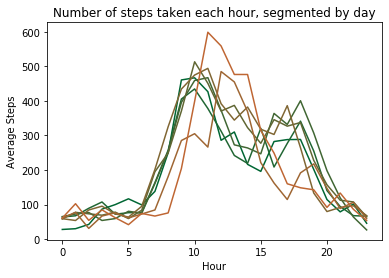

In [137]:
daily = df1.groupby(["day","hour"]).mean().reset_index()
daily.columns = ["day", "hour", "steps"]
fig, ax = plt.subplots()
for i in range(7):
    daily_temp = daily[daily["day"] == i]
    ax.plot(daily_temp["hour"],daily_temp["steps"], color = [1/8 * i,0.4,0.2])

ax.set_xlabel("Hour")
ax.set_ylabel("Average Steps")
ax.set_title("Number of steps taken each hour, segmented by day")
plt.show()